# 10. 머신러닝(군집문제)-1

## 군집분석(Clustering Analysis)

- 비지도학습 중 하나

- 비지도학습: 학습을 시켜줄 class label이 없는 상태에서 학습하는 것

- 비지도학습 - 정답이 없는 문제를 해결!

## K-평균(K-means)

- 군집 알고리즘 중 하나인 k-평균

- 장점

    - 매우 쉬운 구현성

    - 높은 계산 효율성

- 학계와 산업현장 모두에서 사용되어 지고 있다.

- k-means는 프로토타입 기반 군집에 속한다.

- 프로토타입 기반 군집이란?

    - 각 클러스터가 하나의 프로토타입으로 표현된다는 의미

- 프로토타입(prototype)?

    - 연속적인 특성에서는 비슷한 데이터 포인트의 센트로이드(centroid, 평균)

    - 범주형 특성에서는 메도이드(medoid, 가장 자주 등장하는 포인트)

- k-평균 알고리즘은 원형 클러스터를 구분하는데는 뛰어나다.

- 사전에 몇개의 클러스터를 만들것인지에 대해 직접 지정해 줘야 한다는 다소 주관적인 사람의 판단이 개입된다.(k값)

- 적절한 k값을 선택하면 높은 성능을 발휘

- 하지만 부적합한 k값을 선택하면 군집 성능을 보장 할 수 없다.

- 군집 성능이 좋은지 판단하는 방법?

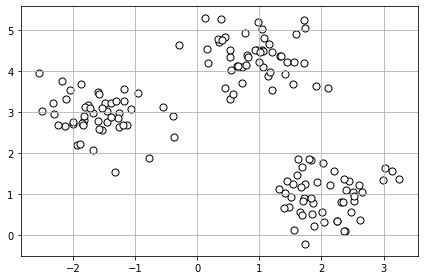

In [10]:
# 무작위 데이터 생성 및 시각화 그래프
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolors='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

- make_blobs()

    - cluster_std: 클러스터의 표준편차 값
    

- 목표

특성의 유사도에 기초하여 데이터들을 그룹으로 모으는 것

### 4단계 k-평균 알고리즘

1. 데이터 포이트에서 **랜덤하게 k개**의 센트로이드를 **초기 클러스터 중심으로 선택**

2. 각 데이터를 **가장 가까운 센트로이드에 할당**한다.

3. 할당된 샘플들의 중심으로 **센트로이드를 이동**시킨다.

4. 클러스터 할당이 변하지 않거나, 사용자가 지정한 허용오차나, 최대 반복횟수에 도달할 때 까지 **두번째와 세번째 과정을 반복**한다.

- 유사도 측정

- 일반적으로 두 데이터 사이의 유클리디안 거리(Euclidean Distance) 혹은 유클리디안 거리 제곱 지표(Squared Euclidean Distance)를 기반하여 간단한 최적화 문제로 k평균 알고리즘을 설명 할 수 있다.

- 최적화 문제

### 최적화 문제

- 클러스터 내의 제곱 오차합(SSE)을 반복적으로 최소화

- 임의의 클러스터의 대표 센트로이드(중심)

- 측정하려는 데이터와 클러스터에 의해 데이터가 **클러스터 내에 있다면 1**, **아니면 0**의 값 출력

- 수식
![](./img/sse.PNG)

- 각 데이터를 가장 가까운 센트로이드에 할당할 때마다, 센트로이드는 이동

- 이렇게 센트로이드가 변화할때마다 이러한 오차 제곱합을 반복적으로 계산

- 변화량에 대한 **허용 오차값**이 일정 수준내로 들어온다면 더이상 클러스터가 변화하지 않는다는 것이고, **최적화가 완료**되었다는 것

- 각 점들간의 거리를 측정할 때, 점들간의 단위와 변동폭이 크다면 당연히 **왜곡**이 일어날 수 있다.

- 왜곡을 줄이고자, 거리 산출시 불필요한 항목간의 특성을 제거하고 단위를 일치시키는 **표준화**과정을 진행하면 더 좋은 결과를 얻을 수 있다.

In [11]:
# k-means
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

- KMeans()

    - init: k평균 알고리즘 설정, 초기 중심 좌표를 무작위로 선정한다

    - tol: 허용오차

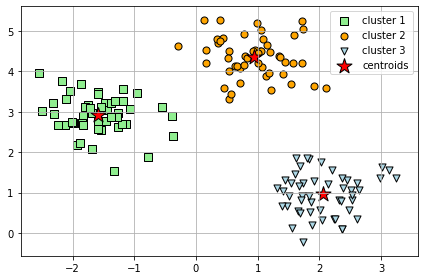

In [18]:
# 시각화 코드
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

- 만약 고차원의 데이터라면 임의의 k값 설정은 위험 부담이 높다.

#### k-means의 특징

- 클러스터가 중첩이 되지 않는다.

- 계측적이지 않다.

- 클러스터당 하나 이상의 데이터가 존재한다.

## K-means++

- 초기 센트로이드를 현명하게 할당할 수 있다.

In [19]:
# k-means++
km_plus = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

- k-means++의 경우 초기값을 설정하는 부분이 k-means와 다르다.

- 가장 멀리 떨어져있는 데이터를 k개 만큼 초기값으로 설정한다.

- 기본 k-means 보다 일관되고 좋은 결과를 보여준다.

- 비지도학습은 클래스 레이블이 없으므로 지도학습의 성능평가를 적용 할 수 없다.

- 군집 품질을 평가해야 하는 경우 **알고리즘 자체의 지표를 사용**해야 한다.

- k 평균 군집의 성능을 비교하기 위해서는 **클러스터 내 오차 제곱합(SSE)**을 사용한다.

#### 관성 - inertia

- 사이킷런에 이미 계산이 되어 있다.

In [20]:
print('왜곡: %.2f' % km.inertia_)

왜곡: 72.48


- 위의 값이 적절한지는 k값을 바꿔가면서 확인하면 된다.

## 엘보우 방법(Elbow method)

최적인 클러스터 개수 k 를 추정

- k값의 증가 => 센트로이드 증가 => 데이터들이 센트로이드에 더 가까워 지는 것 => 왜곡값(SSE)의 감소

- 왜곡이 빠르게 증가하는 지점의 k값을 찾는 것

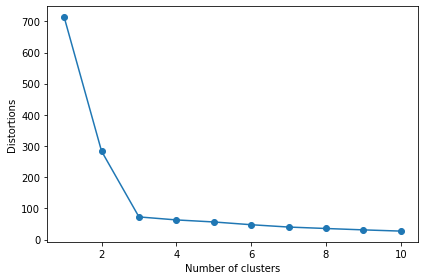

In [28]:
# 1 ~ 10까지 k를 변경하면서 왜곡값 찾기
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

## 실루엣 그래프(silhouette analysis)

군집 품질을 평가하는 또 다른 방법으로

클러스터 내 데이터들이 얼마나 조밀하게 모여있는지를 측정하는 그래프 도구

- 수식

![](./img/silhouette.PNG)

### 과정

1. **하나의 임의의 데이터(x^(i))**와 동일한 클러스터내의 모든 다른 데이터 포인트 사이의 거리를 평균하여 **클러스터 응집력(a^(i))**을 계산한다.

2. 앞서 선정한 데이터와 가장 가까운 클러스터의 모든 샘플간 평균 거리로 최근접 클러스터의 **클러스터 분리도C**를 계산한다.

3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰 값으로 나눠 **실루엣 계수(s^(i))**를 계산한다.

- 응집력과 분리도가 같다면 실루엣 계수는 0이 된다.

- 응집력 보다 분리도가 크다면 이상적인 실루엣 계수 1에 가깝게 된다.


- 분리도: 데이터가 다른 클러스터와 얼마나 다른지를 나타낸다.

- 응집력: 클러스터 내 다른 샘플과 얼마나 비슷한지를 나타낸다.

In [ ]:
- 응집력은 작을수록 클러스터 내 다른 데이터들과 비슷하다는 뜻이다.

- 분리도와 응집력이 같다면 클러스터는 중첩되어 있다는 의미가 된다.

In [25]:
# 실루엣 그래프 데이터
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

### Code

Text(0.5, 0, 'Silhouette coefficient')

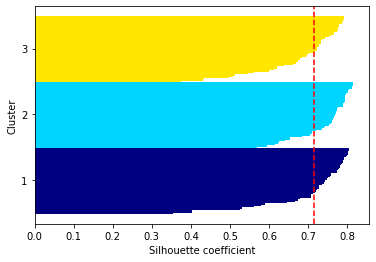

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

- 클러스터의 크기를 확인

- 이상치를 가진 클러스터를 구별

- 위의 실루엣 그래프는 군집이 잘 형성된 경우이다.

### 군집이 잘 이뤄지지 않은 경우

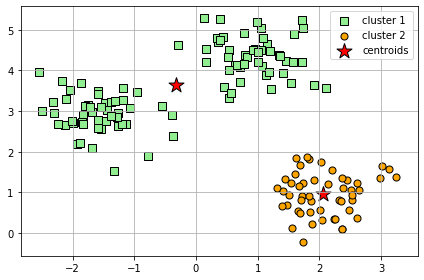

In [34]:
# 클러스터가 2개인 경우
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

# 시각화 코드
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

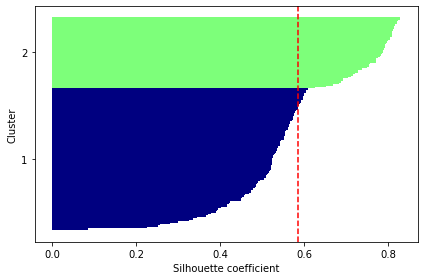

In [36]:
# 실루엣 그래프
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### 정리

- 군집 분석(Clustering Analysis)

    - 클래스 레이블이 없는 데이터를 특정 군집으로 묶고자 할 때 활용

    - K-means 알고리즘은 학계와 산업현장을 가리지 않고 활약

    - K-means의 무작위성을 보완하기 위한 기법 K-means++

<br/>

-----------------

### 퀴즈

1. 다음 중 지도학습이 아닌 것은 무엇인가?
 
    - 선형 회귀
 
    - 군집 분석
 
    - 로지스틱 회귀
 
    - KNN

    답: 군집 분석

2. 지도학습과 비지도학습의 차이점은 클래스 레이블(정답)이 없다는 것이 차이점이다
    
    답: O

3. K-means에서 최적인 클러스터 개수 K를 추정하는 방법으로 왜곡값(SSE)이 급하게 변화하는 부분(point)을 찾는 이 방법(Method)의 이름은? (5글자 - 영어 소문자로 답하시오)
    
    답: elbow

4. 군집분석에 대한 사실로 올바르지 않은 것은?
 
    - 클래스 레이블이 없는 데이터를 특정 군집으로 묶고자 할 때 활용한다.
 
    - K-MEANS 알고리즘은 학계와 산업현장에서 가리지 않고 널리 사용 되고 있다.
 
    - K-MEANS++는 K-MEANS의 무작위 성을 보완하기 위해 나온 기법이다.
 
    - K-MEANS는 하나의 데이터가 여러 클러스터에 중첩 될 수 있다.

    답: K-MEANS는 하나의 데이터가 여러 클러스터에 중첩 될 수 없다.